<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

グラフで日本語を表示するために一度だけ実行

In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fab3d220b7ee0a3365569ad42d860f7d9100503ca2eabaa23e4f5f329537f581
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 回帰  
例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("広告費(x)")
plt.ylabel("売上高(y)")
plt.scatter(x, y)

### 線形回帰モデル(単回帰分析)

$y = ax + b$ のaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

a = float(input('a= '))  # 最初は2あたりから試す
b = float(input('b= '))  # 最初は800あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

scipyライブラリを使って最小二乗法を実行してみる．



a=4.186227665537061,b=694.2336071727316
J=174154.4992816332


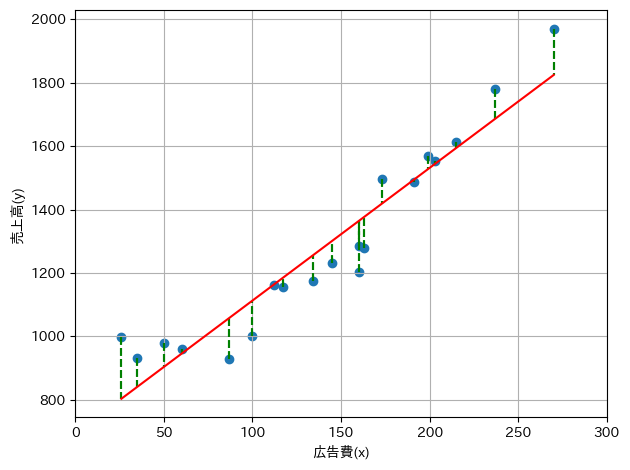

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0, 0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
print('a={},b={}'.format(a,b))

ylin = [estimate_func(result.x,i) for i in x]

fig, axe = plt.subplots()

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 多項式回帰モデル(単回帰分析)

$y = ax^2 + bx + c$ のaとbとcを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

a = float(input('a= '))  # 最初は0.03あたりから試す
b = float(input('b= '))  # 最初は0.2あたりから試す
c = float(input('c= '))  # 最初は700あたりから試す

ylin = [a*i*i + b*i + c for i in x]  # y = ax^2 + bx + c

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

これもscipyライブラリを使って最小二乗法を実行してみる．

a=0.015897,b=-0.24561,c=932.57
J=58668.154113534634


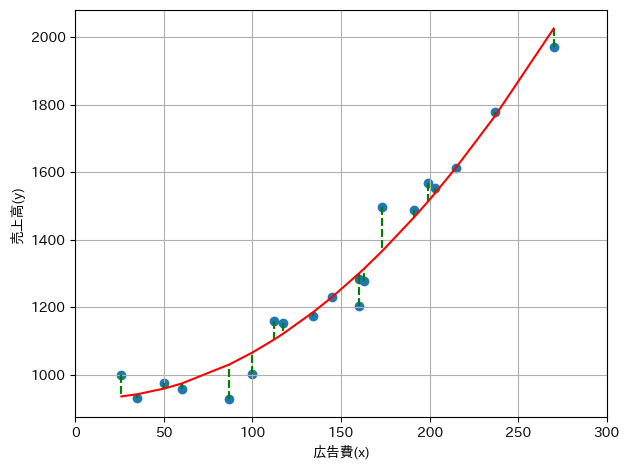

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 2次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x + param[1]*x + param[2])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0.03, 0.2, 700]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
print('a={:.5},b={:.5},c={:.5}'.format(a,b,c))

ylin = [estimate_func(result.x,i) for i in x]

fig, axe = plt.subplots()

# 誤差を合計する (J = result.cost*len(x)でも直接計算可能)
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

**よっしゃ！6次関数にしてみよう！**  
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

a=2.9884e-11,b=-2.947e-08,c=1.1454e-05,d=-0.0022901,e=0.2691,f=-14.675,g=1227.0
J=46090.180389008616


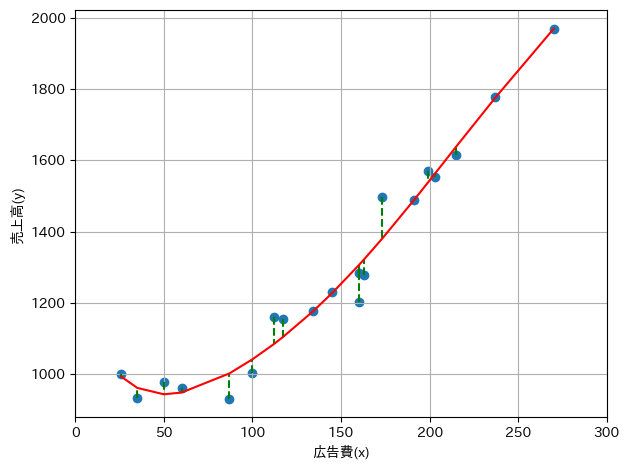

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 6次関数の定義
def estimate_func(param,x):
    return (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - estimate_func(param,x)
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.least_squares(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result.x[0]
b = result.x[1]
c = result.x[2]
d = result.x[3]
e = result.x[4]
f = result.x[5]
g = result.x[6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [estimate_func(result.x,i) for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あんまり変わらない…

## 分類  
例題：ある昆虫のホルモン成分AとBの含有量から，雄と雌を分類する


### まずデータを可視化する

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('成分A(x)')  # x軸ラベル
axe.set_ylabel('成分B(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
#axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 一次直線で分類してみる

$y = ax + b$ のaとbを変えて，緑の線で性別(赤と青の点)を分けてみよう．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

a = float(input('a= '))  # 最初は1.8あたりから試す
b = float(input('b= '))  # 最初は-100あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

residual = [p - q for p, q in zip(y, ylin)]

# 間違いのカウント
nerror = 0
for i in range(len(x)):
    if t[i]*residual[i]>0:
        nerror += 1
print('{}個が誤り'.format(nerror))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('成分A(x)')  # x軸ラベル
axe.set_ylabel('成分B(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="g")
fig.tight_layout()  # レイアウトの設定
plt.show()

＜より複雑な分類に関する参考文献＞  
https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification


## コラム：予測と正解の差を表す名称  
* 損失関数 (loss function)  
* 誤差関数 (error function)  
* コスト関数 (cost function)  
* 目的関数 (objective function)  

ぶっちゃけ，最初はこれらは同じだと思って結構です．いずれも訓練時に用いられ，パラメータを変化させて最小化することによりモデルを向上させます．具体的な関数の名称(例えば平方根とか)ではないことに注意してください．  
  
これらとは別に「評価関数」(evaluation function)という言葉があります．損失関数らとは「いつ使うか」が異なります．訓練データではなく，実際のデータ(この後に取り扱う「検証データ」)を用いて，そのモデルの良し悪しを評価するときに使用します．

[わかりやすい説明はここ](https://zenn.dev/nekoallergy/articles/machinelearning-func)